<a href="https://colab.research.google.com/github/tbala2805/models/blob/master/StockpredictionTest1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt
import urllib.request, json
import os
 
 
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [38]:
#Load data
company = 'ADANIPORTS.NS'
#start = dt.datetime(2000,1,1)
#end = dt.datetime.now()
 
data = web.DataReader(company, data_source='yahoo', start='2000-01-01', end='2021-06-16')
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2007-11-27,207.000000,154.000000,154.000000,191.800003,27262365.0,177.675140
2007-11-28,197.800003,174.929993,194.000000,177.000000,21958915.0,163.965057
2007-11-29,182.800003,168.460007,181.000000,177.399994,25616715.0,164.335602
2007-11-30,191.399994,178.000000,178.000000,185.800003,23047035.0,172.117004
2007-12-03,198.860001,184.399994,187.949997,196.000000,14578850.0,181.565826
...,...,...,...,...,...,...
2021-06-11,856.400024,820.700012,852.000000,839.750000,17460610.0,833.907837
2021-06-14,783.700012,681.099976,755.799988,768.450012,89771631.0,763.103882
2021-06-15,802.900024,755.000000,802.900024,761.849976,45408426.0,756.549805


In [39]:
#prices#Prepare the data
stock='Adj Close'
scaler= MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data[stock].values.reshape(-1,1))

prediction_days = 90

x_train = []
y_train = []

for x in range(prediction_days,len(scaled_data)):
  x_train.append(scaled_data[x-prediction_days:x, 0])
  y_train.append(scaled_data[x, 0])



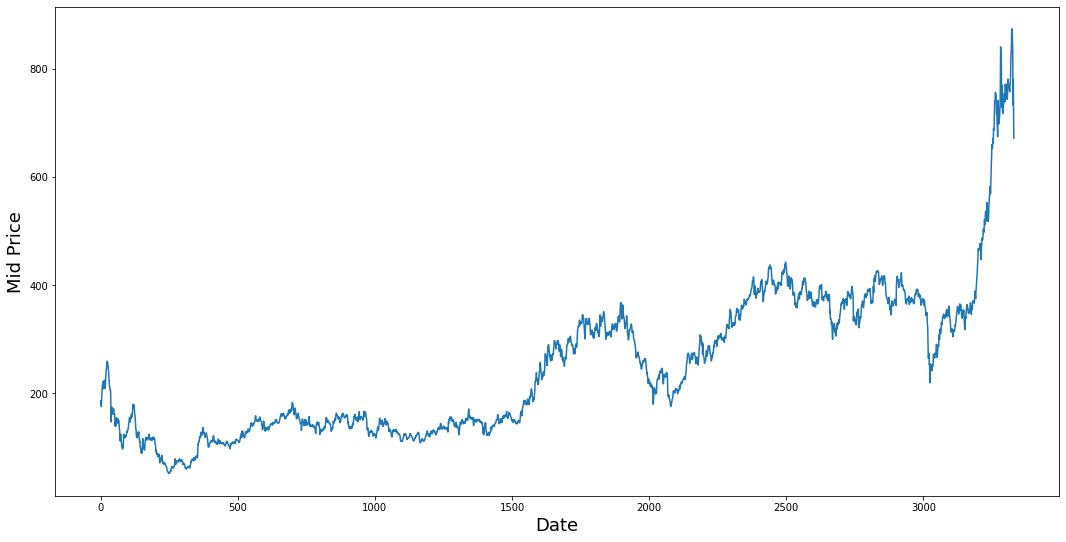

In [40]:
plt.figure(figsize = (18,9))
plt.plot(range(data.shape[0]),(data['Low']+data['High'])/2.0)
#plt.xticks(range(0,data.shape[0],500),data['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [41]:
x_train,y_train = np.array(x_train),np.array(y_train)


In [42]:
#x_train = np.reshape(x_train,(x_train.shape[0],x_train[1], 1))
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))

In [43]:
#MODel
model = Sequential()
model.add(LSTM(units=50, return_sequences='True',input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences='True'))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [44]:
model.compile(optimizer='adadelta', loss='mean_squared_error')
model.fit(x_train,y_train,epochs=10,batch_size=256,verbose=1)

Epoch 1/10
13/13 [==============================] - 11s 413ms/step - loss: 0.0841
Epoch 2/10
13/13 [==============================] - 5s 419ms/step - loss: 0.0837
Epoch 3/10
13/13 [==============================] - 5s 404ms/step - loss: 0.0834
Epoch 4/10
13/13 [==============================] - 5s 404ms/step - loss: 0.0832
Epoch 5/10
13/13 [==============================] - 5s 417ms/step - loss: 0.0829
Epoch 6/10
13/13 [==============================] - 5s 409ms/step - loss: 0.0825
Epoch 7/10
13/13 [==============================] - 5s 410ms/step - loss: 0.0823
Epoch 8/10
13/13 [==============================] - 5s 408ms/step - loss: 0.0822
Epoch 9/10
13/13 [==============================] - 5s 410ms/step - loss: 0.0818
Epoch 10/10
13/13 [==============================] - 5s 407ms/step - loss: 0.0815


In [45]:
#test_start = dt.datetime(2021,1,1)
#test_end = dt.datetime.now()
 
test_data=web.DataReader(company, data_source='yahoo', start='2000-01-01', end='2021-06-16')
actual_prices = test_data[stock].values
 
total_dataset=pd.concat((data[stock],test_data[stock]), axis=0)
 
model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

In [46]:
#Make the Predicitons
x_test = []
 
for x in range (prediction_days, len(model_inputs+1)):
  x_test.append(model_inputs[x-prediction_days:x, 0])
 
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))
predictions= model.predict(x_test)
predictions= scaler.inverse_transform(predictions)

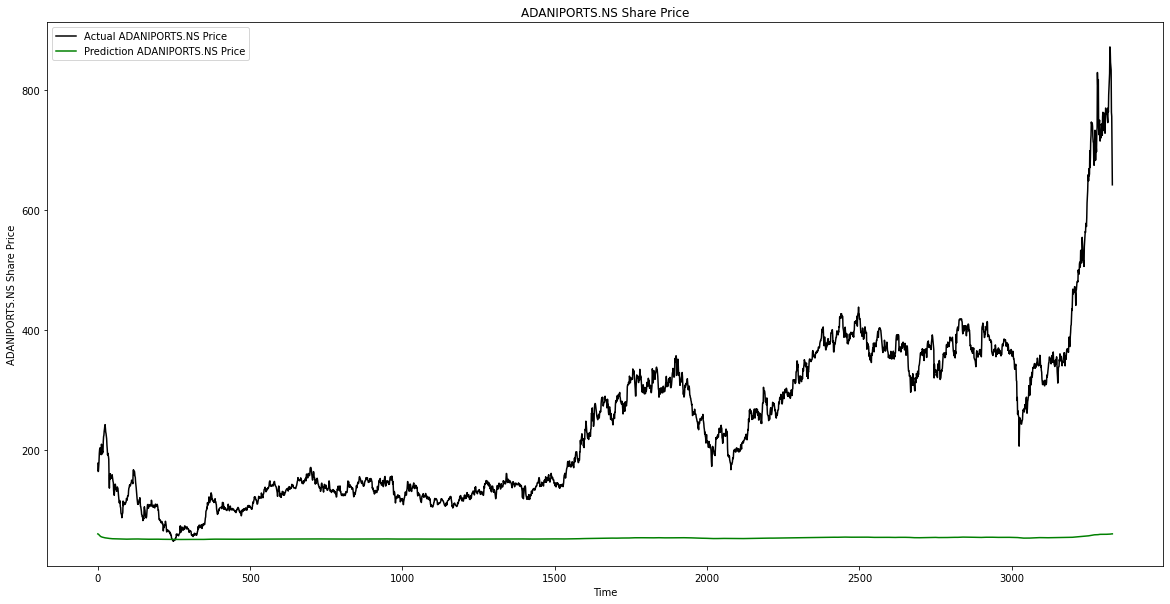

In [47]:
plt.figure(figsize=(20,10))
plt.plot(actual_prices, color="black", label=f"Actual {company} Price")
plt.plot(predictions, color='green', label=f"Prediction {company} Price")
plt.title(f"{company} Share Price")
plt.xlabel('Time')
plt.ylabel(f'{company} Share Price')
plt.legend()
plt.show()

In [48]:
real_data = [model_inputs[len(model_inputs)+1 - prediction_days:len(model_inputs+1),0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

In [49]:
prediction = model.predict(real_data)
prediction = scaler.inverse_transform (prediction)
print(f"Predicition: {prediction}")
#plt.plot(prediction)

Predicition: [[59.916878]]
